## 분류 모델 vs 군집 모델

| **특징**             | **분류 모델**   | **군집 모델**        |
|----------------------|----------------------------------------|-----------------------------------------|
| **학습 종류**      | 지도 학습 | 비지도 학습 |
| **목적**             | 사전 정의된 클래스(범주)로 분류         | 데이터 포인트를 유사한 그룹(군집)으로 묶기 |
| **라벨 존재 여부**   | 사전 정의된 라벨이 있음                | 사전 정의된 라벨이 없음                 |
| **데이터 분할**      | 학습 데이터와 테스트 데이터로 분할       | 전체 데이터 사용                        |
| **예측**             | 새로운 데이터 포인트의 라벨 예측         | 데이터 내의 구조 발견 및 그룹 형성       |
| **사용 사례**        | 스팸 이메일 필터링, 질병 진단, 이미지 인식 | 고객 세분화, 이미지 분할, 이상 탐지       |
| **평가 방식**        | 정확도, 정밀도, 재현율 등               | 실루엣 점수, 다빈치 지수 등              |

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
iris = pd.read_csv("iris.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
## 사용할 피쳐 컬럼

# iris.columns[:-1]
features = ["sepal_length", "sepal_width"]

In [4]:
df = iris[features]

df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [44]:
# pca = PCA(n_components=2)

# pca_2 = pca.fit_transform(df)

df.iloc[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

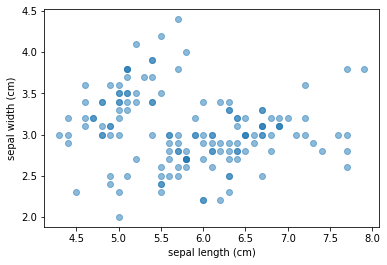

In [5]:
from matplotlib import pyplot as plt
x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [53]:
## https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

np.random.uniform(1,10,3)

array([8.73186324, 1.00575934, 8.01798788])

In [6]:
cent_numbs = 3
# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
centroids_x = np.random.uniform(min(x), max(x), cent_numbs)
centroids_y = np.random.uniform(min(y), max(y), cent_numbs)
centroids = list(zip(centroids_x, centroids_y))
centroids

[(6.638951058372849, 3.1702689767130945),
 (7.3012310531233595, 4.360477309474889),
 (6.851331693192751, 3.5368680163616926)]

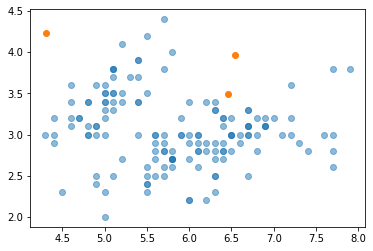

In [55]:
plt.scatter(x, y, alpha=0.5)	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y)	# centroids는 주황색으로 표시됩니다
plt.show()

#### 유클리디안 거리 계산

<img src="https://velog.velcdn.com/images/newnew_daddy/post/c5edca47-2985-4902-a3b7-8bef88b77d1d/image.png" width="35%">

In [57]:
np.sqrt(25)

5.0

In [7]:
def uc_distance(a, b):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    
    return np.sqrt(dx**2 + dy**2)

In [64]:
sepal_length_width = np.array(list(zip(x, y)))
uc_distance(sepal_length_width[1], centroids[0])

1.6397036810473147

In [73]:
labels = np.zeros(len(df))

for i in range(len(df)):
    distances = np.zeros(cent_numbs)
    
    for j in range(cent_numbs):
        distances[j] = uc_distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)
    labels[i] = cluster

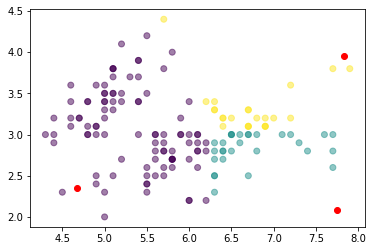

In [75]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

In [76]:
## centroid update


centroids_old = deepcopy(centroids)

centroids_old

[(4.675015111528913, 2.3565564865747026),
 (7.749865419465825, 2.081056613093015),
 (7.826007478729053, 3.9477438999104173)]

In [94]:
df.shape, labels.shape, type(df), type(pd.DataFrame(labels))

df_lb = pd.concat([df, pd.DataFrame(labels, columns=['label'])], axis=1)

In [95]:
points = []

df_0 = df_lb[df_lb['label'] == 0]
df_1 = df_lb[df_lb['label'] == 1]
df_2 = df_lb[df_lb['label'] == 2]

df_0.shape, df_1.shape, df_2.shape

((97, 3), (29, 3), (24, 3))

In [105]:
df_0.iloc[:, [0, 1]].values.tolist()

np.mean(df_0.iloc[:, [0, 1]].values.tolist(), axis=0)

array([5.35154639, 3.06082474])

In [107]:
print(centroids)

for k in range(cent_numbs):
    _df = df_lb[df_lb['label'] == k]
    _means = np.mean(_df.iloc[:, [0, 1]].values.tolist(), axis=0)
    
    centroids[k] = _means
    
print(centroids)

[(4.675015111528913, 2.3565564865747026), (7.749865419465825, 2.081056613093015), (7.826007478729053, 3.9477438999104173)]
[array([5.35154639, 3.06082474]), array([6.75862069, 2.82758621]), array([6.725     , 3.32083333])]


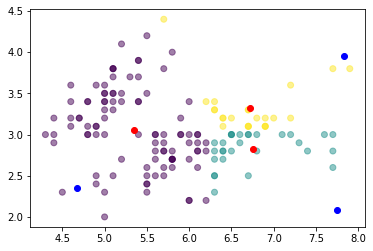

In [111]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter([i[0] for i in centroids_old], [i[1] for i in centroids_old], c='blue')
plt.scatter([i[0] for i in centroids], [i[1] for i in centroids], c='red')
plt.show()

In [19]:
from IPython.display import clear_output
import time

x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width
sepal_length_width = list(zip(x, y))

ITER :  1


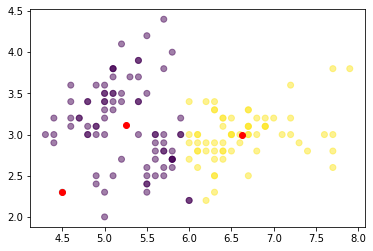

ITER :  2


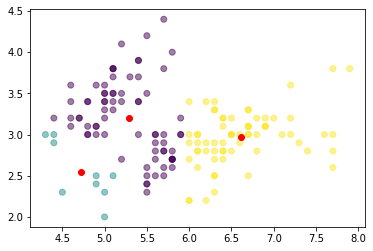

ITER :  3


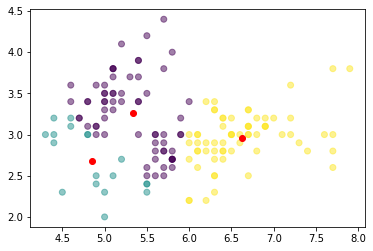

ITER :  4


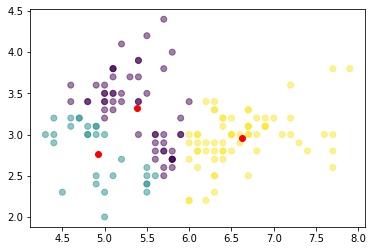

ITER :  5


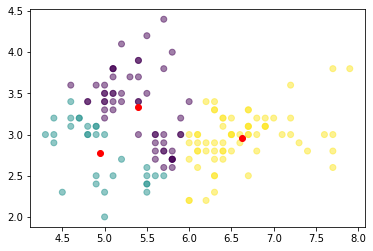

ITER :  6


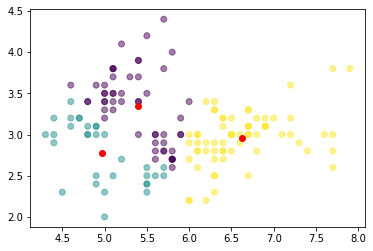

In [20]:

centroids_x = np.random.uniform(min(x), max(x), cent_numbs)
centroids_y = np.random.uniform(min(y), max(y), cent_numbs)
_centroids = list(zip(centroids_x, centroids_y))
_labels = np.zeros(len(df))
_diff = np.zeros(cent_numbs)

for i in range(6):
    print("ITER : ", i+1)
    for i in range(len(df)):
        distances = np.zeros(cent_numbs)
        
        for j in range(cent_numbs):
            distances[j] = uc_distance(sepal_length_width[i], _centroids[j])
        cluster = np.argmin(distances)
        _labels[i] = cluster
        
    centroids_old = deepcopy(_centroids)

    df_lb = pd.concat([df, pd.DataFrame(_labels, columns=['label'])], axis=1)

    for k in range(cent_numbs):
        _df = df_lb[df_lb['label'] == k]
        _means = np.mean(_df.iloc[:, [0, 1]].values.tolist(), axis=0)
        
        _centroids[k] = _means
        
        _diff[k] = uc_distance(centroids_old[k], _centroids[k])
    plt.scatter(x, y, c=_labels, alpha=0.5)
    # plt.scatter([i[0] for i in centroids_old], [i[1] for i in centroids_old], c='blue')
    plt.scatter([i[0] for i in _centroids], [i[1] for i in _centroids], c='red')
    plt.show()
    # clear_output(wait=True)
    # time.sleep(1.5)
    if not sum(_diff): 
        plt.scatter(x, y, c=_labels, alpha=0.5)
        # plt.scatter([i[0] for i in centroids_old], [i[1] for i in centroids_old], c='blue')
        plt.scatter([i[0] for i in _centroids], [i[1] for i in _centroids], c='red')
        plt.show()
        break

## Clustering with sklearn

In [215]:
from sklearn.cluster import KMeans

In [217]:
model = KMeans(n_clusters=3)

In [ ]:
x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width

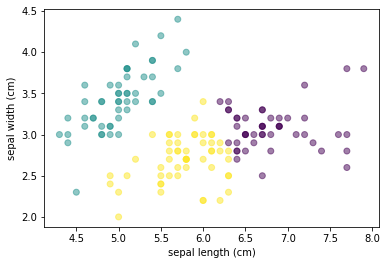

In [237]:
model = KMeans(n_clusters = 3)
model.fit(df)
labels = model.predict(df)
# 클러스터링 결과를 시각화합니다
x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [225]:
target = df_lb['label']

In [226]:
species = np.chararray(target.shape, itemsize=150)
for i in range(len(df)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'


In [234]:
import pandas as pd

df_2 = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df_2['labels'], df_2['species'])
print(ct)


species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               47              0             0
1                0              0            50
2                0             53             0


## Elbow Method

In [250]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

In [240]:
_iris = iris[iris.columns[:-1]]

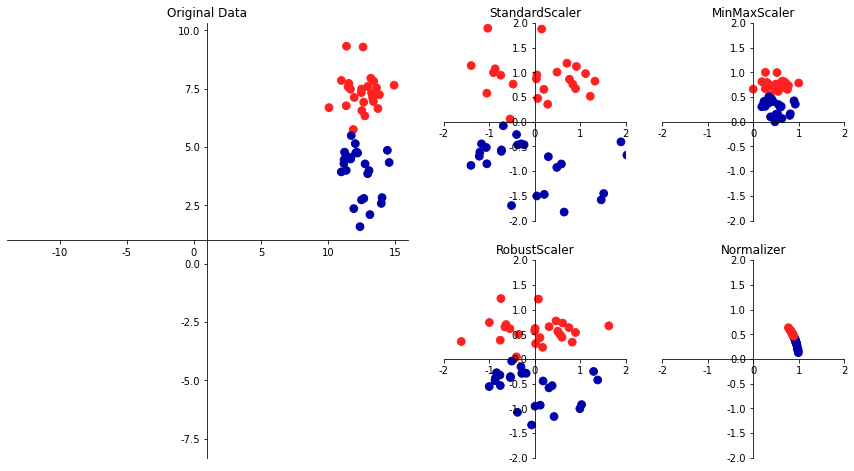

In [283]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()
plt.show()